# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (27)

## Aplicar un caso de uso (*Time Series Forecasting*)

In [ ]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

En esta sesión intentaremos predecir las **ventas mensuales de corticosteroides en Australia**. Estos medicamentos se conocen como **fármacos H02** según el esquema de clasificación Anatómico Terapéutico Químico (_ATC_)y se utilizan principalmente por sus efectos **antiinflamatorios** e inmunosupresores. Por ejemplo __Dexametasona__ y __Betametasona__ son algunos ejemplos de medicamentos de la clase H02.

Dascargamos la serie temporal con las ventas mensuales en **millones de dólares** en fármacos **H02** que se han recetado en el **sistema de salud Australiano** entre los años de **1991 y 2008**.

In [ ]:
df = pd.read_csv('dataset_h02.csv')
df

,fecha,venta_h02
0,1992-04-01,0.379808
1,1992-05-01,0.361801
2,1992-06-01,0.410534
3,1992-07-01,0.483389
4,1992-08-01,0.475463
...,...,...
190,2008-02-01,0.761822
191,2008-03-01,0.649435
192,2008-04-01,0.827887
193,2008-05-01,0.816255


In [ ]:
# Definir un rango de fechas con pasos fijos
fechas = pd.date_range(start=df['fecha'].values[0], end=df['fecha'].values[-1], freq='MS')

# Asignar a las fechas como los índices del DataFrame
df.set_index(fechas, inplace=True)

# Quitar la columna 'fecha' de la tabla
df.drop(columns='fecha', inplace=True)

df

,venta_h02
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887
2008-05-01,0.816255


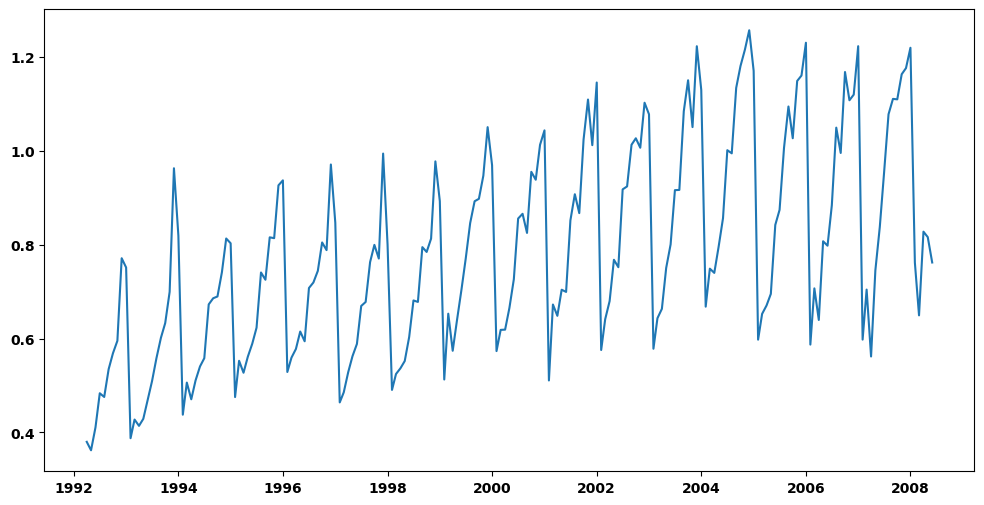

In [ ]:
# Visualizamos los datos preparados
plt.plot(df)
plt.show()

In [ ]:
# Las gráficas interactivas ayudan bastante a los analistas de datos, sobre todo a la hora de analizar y explorar las series temporales
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['venta_h02'],
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas mensuales de corticosteroides (H02) en Australia",
                  title_font_size=26,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de dólares (A$)'
                  )

fig.show()

---

### **`Ejercicio 27.1`**
**`27.1.1`** Aplica una descomposición de la serie temporal mediante el método `seasonal_decompose` y visualiza los componentes correspondientes. Describe la tendencia y la estacionalidad si son presentes en la serie temporal.

In [ ]:
#27.1

from statsmodels.tsa.seasonal import seasonal_decompose

data_df_des = seasonal_decompose(df, model='additive')

display(data_df_des.trend)
display(data_df_des.seasonal)
display(data_df_des.resid)

1992-04-01   NaN
1992-05-01   NaN
1992-06-01   NaN
1992-07-01   NaN
1992-08-01   NaN
              ..
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
2008-06-01   NaN
Freq: MS, Name: trend, Length: 195, dtype: float64

1992-04-01   -0.197142
1992-05-01   -0.136918
1992-06-01   -0.099412
1992-07-01   -0.010318
1992-08-01    0.044799
                ...   
2008-02-01   -0.248494
2008-03-01   -0.177644
2008-04-01   -0.197142
2008-05-01   -0.136918
2008-06-01   -0.099412
Freq: MS, Name: seasonal, Length: 195, dtype: float64

1992-04-01   NaN
1992-05-01   NaN
1992-06-01   NaN
1992-07-01   NaN
1992-08-01   NaN
              ..
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
2008-06-01   NaN
Freq: MS, Name: resid, Length: 195, dtype: float64

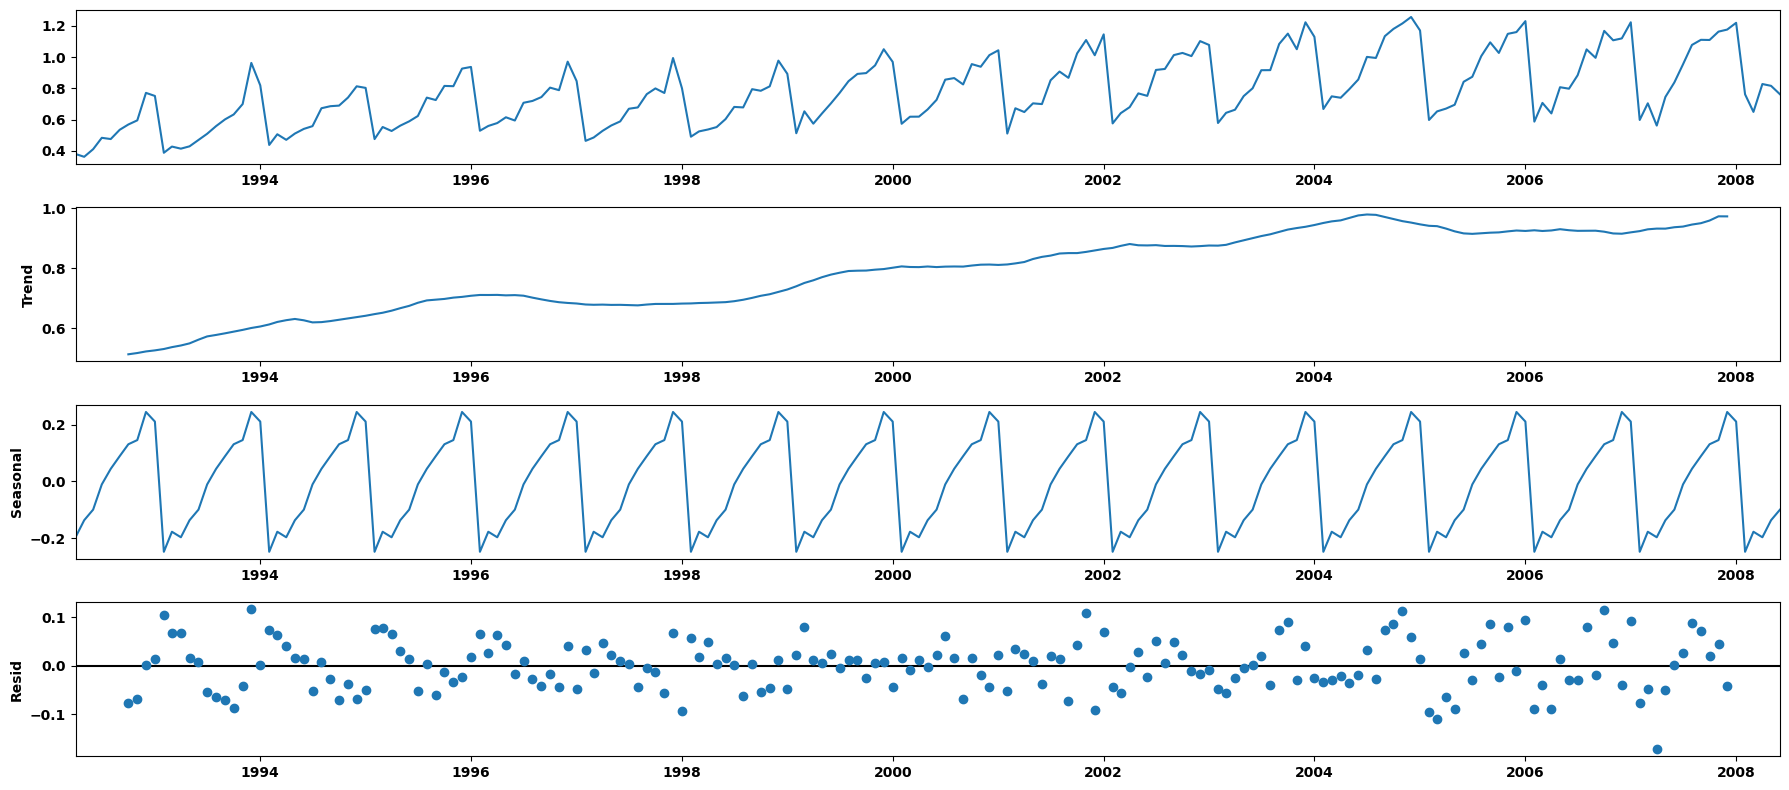

In [ ]:
# Establecer el tamaño de la imégen
rcParams['figure.figsize'] = 18, 8

# Graficar la descomposición de la serie temporal
data_df_des.plot()
plt.show()

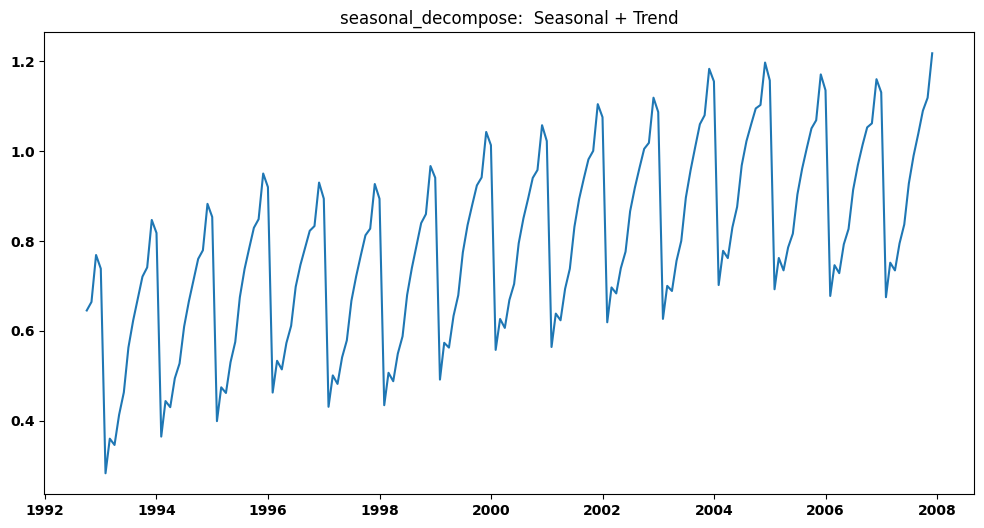

In [ ]:
rcParams['figure.figsize'] = 12, 6
plt.plot(data_df_des.seasonal + data_df_des.trend)
plt.title("seasonal_decompose:  Seasonal + Trend")
plt.show()

**`27.1.2`** Saca la gráfica de ***correlograma*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica:

 - `lags=60`

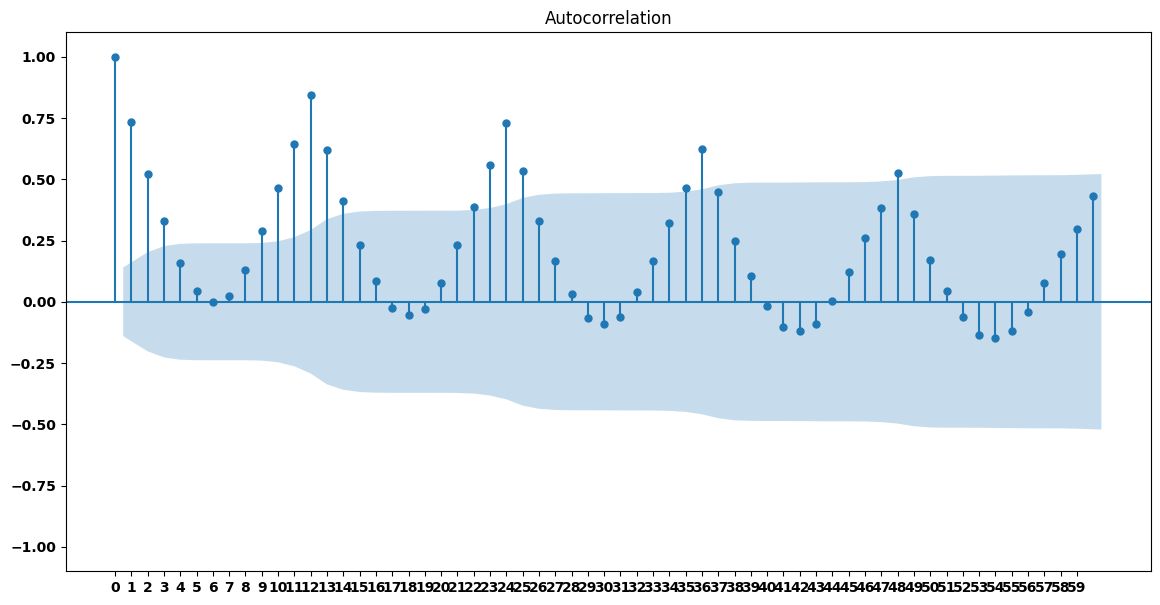

In [ ]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf
rcParams['figure.figsize'] = 14, 7
plot_acf(df, lags=60)
plt.xticks(np.arange(60))
plt.ylim(-1.1,1.1)
plt.show()

Como podemos observar en la grafica vemos que existe una correlacion entre variables,la cual disminuye conforme avanza los años

**`24.1.3`** Saca la gráfica de ***Autocorrelación parcial*** para la serie temporal, considerando el método con los retrasos indicados y analiza los patrones que ves presente en esta gráfica:

 - `lags=48`
 - `method='ywm'`

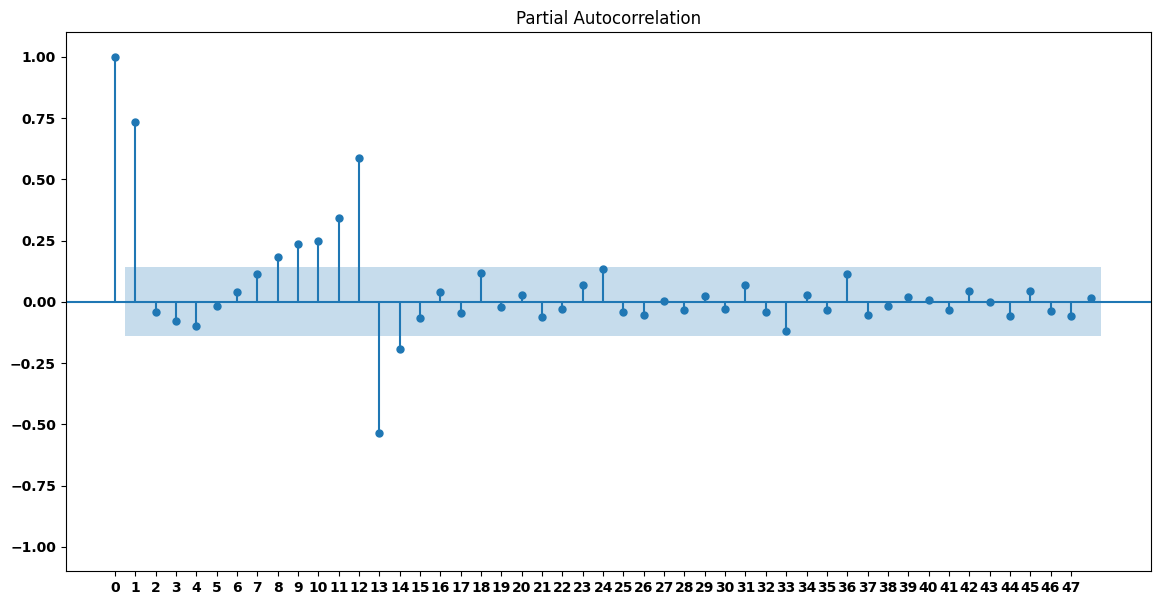

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df, lags=48, method='ywm')
plt.xticks(np.arange(48))
plt.ylim(-1.1,1.1)
plt.show()

Como podemos observar en la grafica vemos que existe una correlacion entre variables,la cual solo esta presente en el primer año

**`27.1.4`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos:

 - `win = 12`

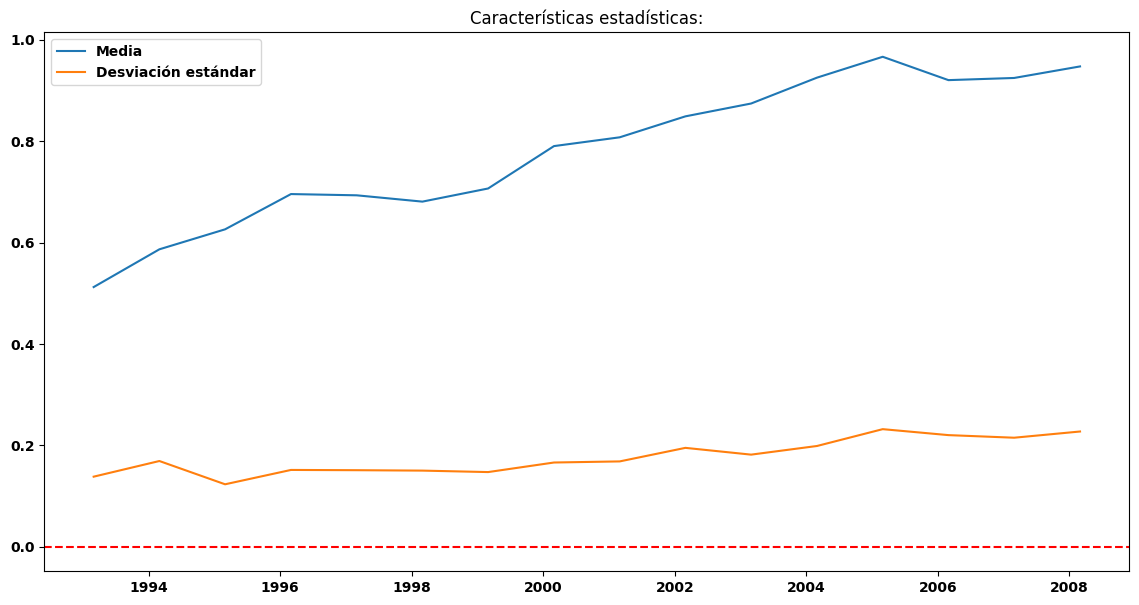

In [ ]:
win = 12
df_media = df.rolling(win).mean().iloc[win-1::win]
df_std = df.rolling(win).std().iloc[win-1::win]
plt.plot(df_media, label='Media')
plt.plot(df_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas:")
plt.legend()
plt.show()

como podemos ver en la grafica vemos que conforme avanzan los años la media aumenta y la desviacion estandar tiene picos de crecimiento y disminucion

---

### **`Ejercicio 27.2`**

Vamos a intentar a modelar la serie temporal con el objetivo de **predecir los valores mensuales del último año**.

**`27.2.1`** Aplica el método de `Seasonal Naïve` a la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Grafica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.






In [ ]:
# Definir el periodo de prueba (horizonte de predicción)
horizonte = 12  # La cantidad de puntos a predecir
df_test = df.tail(horizonte)
df_test

,venta_h02
2007-07-01,0.954144
2007-08-01,1.078219
2007-09-01,1.110982
2007-10-01,1.109979
2007-11-01,1.163534
2007-12-01,1.176589
2008-01-01,1.219941
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887


In [ ]:
df_train = df[df.index.isin(df_test.index)==False]
df_train

,venta_h02
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2007-02-01,0.597753
2007-03-01,0.704398
2007-04-01,0.561760
2007-05-01,0.745258


In [ ]:
pred_sn = pd.DataFrame(data=df_train.tail(12).values, index=df_test.index, columns=['pred'])
pred_sn

,pred
2007-07-01,0.884312
2007-08-01,1.049648
2007-09-01,0.995709
2007-10-01,1.168253
2007-11-01,1.108038
2007-12-01,1.120053
2008-01-01,1.223319
2008-02-01,0.597753
2008-03-01,0.704398
2008-04-01,0.561760


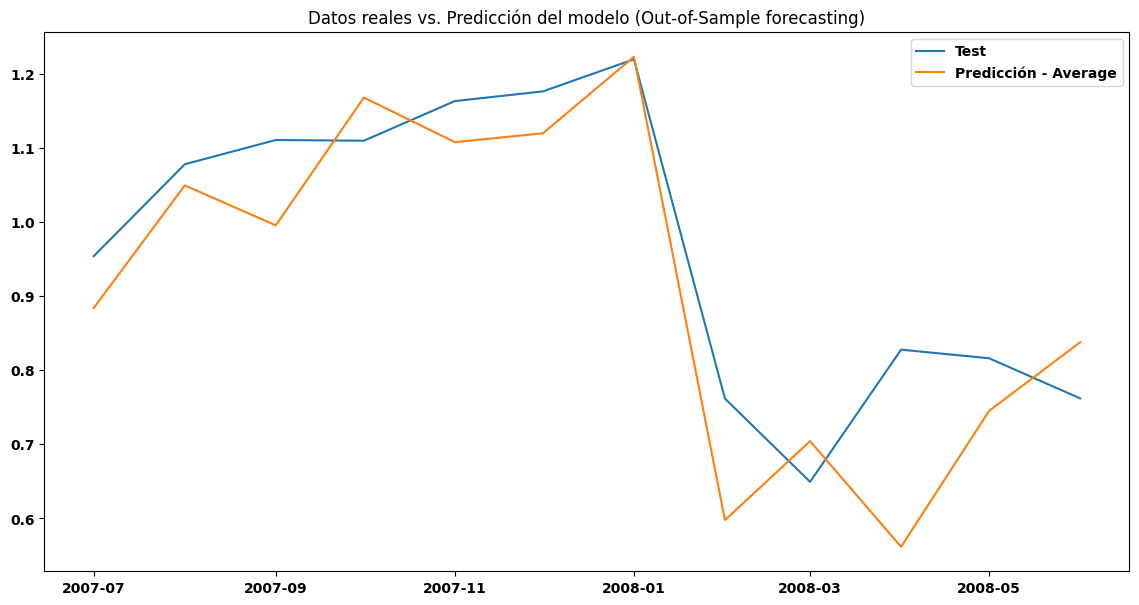

In [ ]:
plt.plot(df_test, label='Test')
plt.plot(pred_sn, label='Predicción - Average')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas de evaluación del modelo
print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_sn))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_sn)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_sn))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_sn)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_sn))

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 0.08494277166666668
Mean Absolute Percentage Error: 9.686181826381263
Mean Squared Error (MSE): 0.011684411050918485
Root Mean Squared Error (RMSE): 0.10809445430232989
R^2 coefficient of determination: 0.6717644471769628


Como podemos observar en la grafica y en sus metricas de evaluacion,vemos que nuestro modelo tiene buenas predicciones aunque no es el mejor modelo ya que tiene un porcentage de error de casi un 10%

**`27.2.2`** Aplica el método estadístico de `Autoregresión - AR` considerando el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Después consigue estos puntos **y analiza los resultados obtenidos**:
- Resumen del modelo ajustado (_Model fit summary_)
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráficas de análisis del componente residual (curvas de diagnóstico, correlaciones con otras variables)
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción de este modelo con **sus intervalos de confianza** y los valores reales del último año.
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

mod_ar = AutoReg(df_train, lags=48)
fit_ar = mod_ar.fit()
fit_ar.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              venta_h02   No. Observations:                  183
Model:                    AutoReg(48)   Log Likelihood                 246.028
Method:               Conditional MLE   S.D. of innovations              0.039
Date:                Sat, 13 May 2023   AIC                           -392.057
Time:                        18:07:54   BIC                           -246.793
Sample:                    04-01-1996   HQIC                          -333.026
                         - 06-01-2007                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0506      0.030      1.710      0.087      -0.007       0.109
venta_h02.L1     -0.0349      0.086     -0.403      0.687      -0.204       0.135
venta_h02.L2      0.4420      0.087      5.101      0.000       0.272       0.612
venta_h02.L3      0.4070      0.095      4.291      0.000       0.221       0.593
venta_h02.L4     -0.0464      0.101     -0.460      0.645      -0.244       0.151
venta_h02.L5     -0.0189      0.102     -0.186      0.853      -0.218       0.180
venta_h02.L6     -0.0014      0.101     -0.014      0.989      -0.200       0.197
venta_h02.L7      0.0753      0.101      0.745      0.456      -0.123       0.273
venta_h02.L8      0.0044      0.100      0.044      0.965      -0.192       0.201
venta_h02.L9      0.0547      0.100      0.544      0.586      -0.142       0.251
venta_h02.L10    -0.0785      0.099     -0.790      0.430      -0.273       0.116
venta_h02.L11    -0.1979      0.094     -2.099      0.036      -0.383      -0.013
venta_h02.L12     0.5287      0.096      5.498      0.000       0.340       0.717
venta_h02.L13     0.1445      0.102      1.423      0.155      -0.055       0.344
venta_h02.L14    -0.1845      0.103     -1.793      0.073      -0.386       0.017
venta_h02.L15    -0.2978      0.101     -2.938      0.003      -0.497      -0.099
venta_h02.L16     0.0130      0.100      0.130      0.896      -0.183       0.209
venta_h02.L17     0.0425      0.100      0.425      0.671      -0.154       0.239
venta_h02.L18     0.0159      0.102      0.157      0.876      -0.183       0.215
venta_h02.L19    -0.1526      0.102     -1.500      0.134      -0.352       0.047
venta_h02.L20    -0.1827      0.102     -1.790      0.073      -0.383       0.017
venta_h02.L21     0.0314      0.106      0.297      0.766      -0.176       0.238
venta_h02.L22     0.0621      0.106      0.586      0.558      -0.145       0.270
venta_h02.L23     0.3064      0.104      2.955      0.003       0.103       0.510
venta_h02.L24     0.0642      0.107      0.597      0.550      -0.146       0.275
venta_h02.L25    -0.1334      0.108     -1.236      0.217      -0.345       0.078
venta_h02.L26     0.1014      0.106      0.952      0.341      -0.107       0.310
venta_h02.L27     0.1550      0.106      1.459      0.145      -0.053       0.363
venta_h02.L28    -0.0563      0.100     -0.566      0.571      -0.251       0.139
venta_h02.L29    -0.2022      0.099     -2.037      0.042      -0.397      -0.008
venta_h02.L30    -0.1102      0.099     -1.116      0.265      -0.304       0.083
venta_h02.L31     0.0337      0.098      0.344      0.731      -0.159       0.226
venta_h02.L32     0.1788      0.100      1.787      0.074      -0.017       0.375
venta_h02.L33    -0.2030      0.101     -2.005      0.045      -0.402      -0.005
venta_h02.L34    -0.0346      0.103     -0.338      0.736      -0.236       0.166
venta_h02.L35     0.0658      0.100      0.655      0.512      -0.131       0.263
venta_h02.L36     0.3031      0.101      3.

In [ ]:
estim_mod_ar = fit_ar.fittedvalues
estim_mod_ar

1996-04-01    0.550499
1996-05-01    0.550105
1996-06-01    0.593512
1996-07-01    0.711574
1996-08-01    0.784991
                ...   
2007-02-01    0.573133
2007-03-01    0.696251
2007-04-01    0.587653
2007-05-01    0.791711
2007-06-01    0.780042
Freq: MS, Length: 135, dtype: float64

In [ ]:
pred_mod_ar = fit_ar.forecast(steps=12)
pred_mod_ar

2007-07-01    0.896650
2007-08-01    1.043430
2007-09-01    1.014030
2007-10-01    1.216538
2007-11-01    1.165268
2007-12-01    1.197656
2008-01-01    1.163550
2008-02-01    0.619112
2008-03-01    0.716028
2008-04-01    0.676230
2008-05-01    0.827267
2008-06-01    0.867919
Freq: MS, dtype: float64

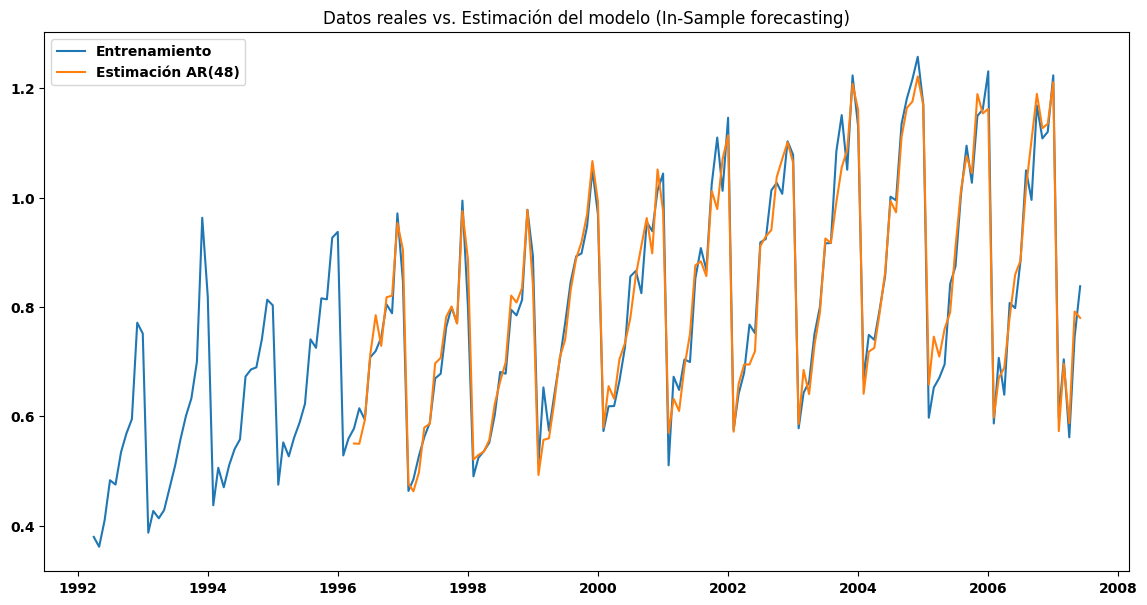

In [ ]:
plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_mod_ar, label='Estimación AR(48)')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()


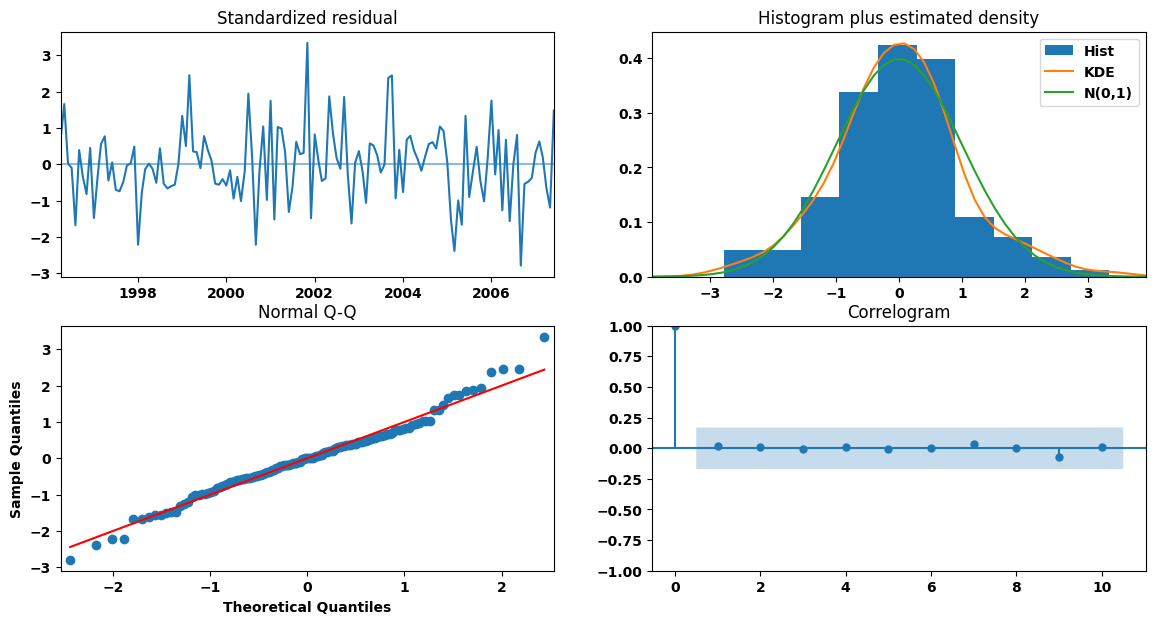

In [ ]:
# Analizamos el componente residual
# Sacar las gráficas del rendimiento del modelo ajustado
fit_ar.plot_diagnostics()
plt.show()

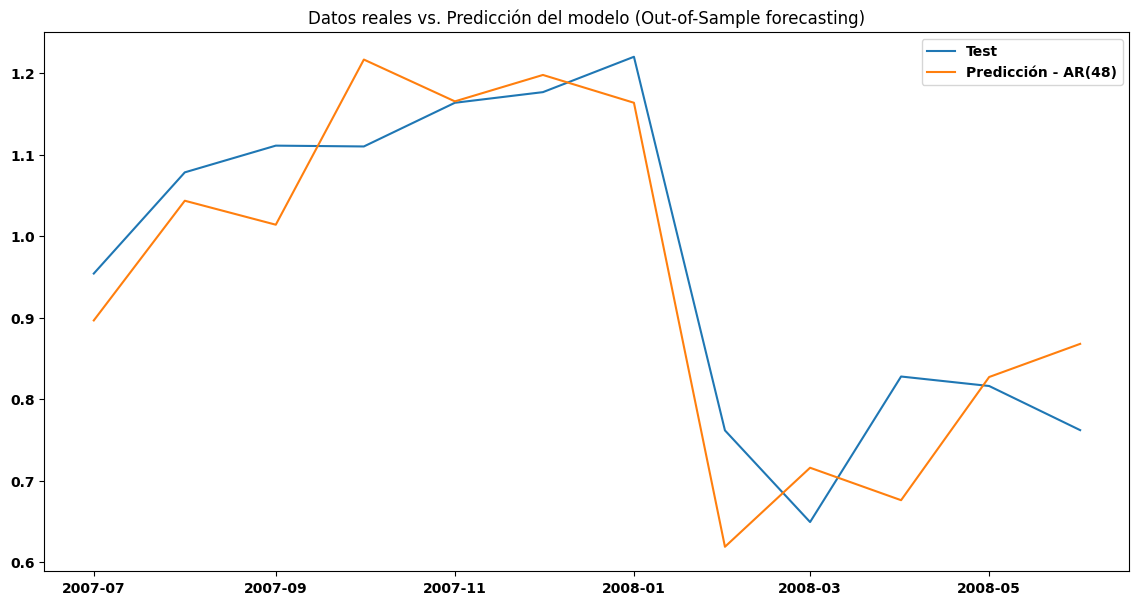

In [ ]:
resid_mod_ar = fit_ar.resid
plt.plot(df_test, label='Test')
plt.plot(pred_mod_ar, label='Predicción - AR(48)')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [ ]:
conf_mod_ar = fit_ar.get_prediction(start=df_test.index[0], end=df_test.index[-1]).conf_int()
conf_mod_ar


,lower,upper
2007-07-01,0.819996,0.973305
2007-08-01,0.966729,1.120131
2007-09-01,0.930141,1.097919
2007-10-01,1.127832,1.305245
2007-11-01,1.076068,1.254468
2007-12-01,1.105040,1.290273
2008-01-01,1.069973,1.257127
2008-02-01,0.523791,0.714434
2008-03-01,0.619605,0.812451
2008-04-01,0.578082,0.774379


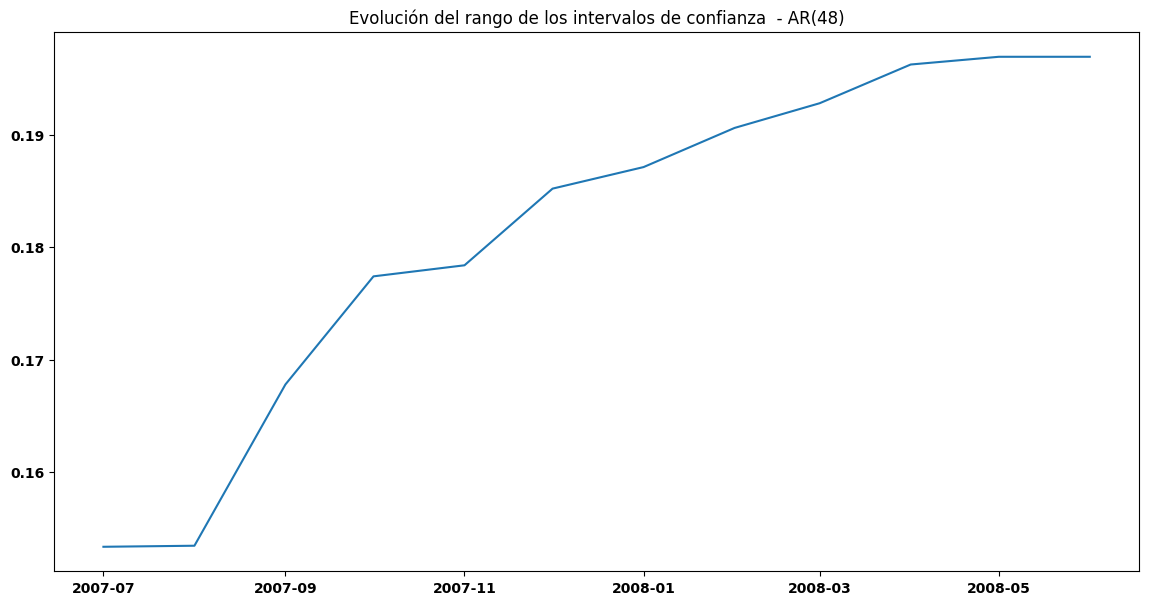

In [ ]:
conf_mod_ar['delta'] = conf_mod_ar.apply(lambda x: x['upper'] - x['lower'], axis=1)
conf_mod_ar
plt.plot(conf_mod_ar['delta'])
plt.title("Evolución del rango de los intervalos de confianza  - AR(48)")
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))



fig.add_trace(go.Scatter(
    x=pred_mod_ar.index,
    y=pred_mod_ar,
    name="Predicción (AR)",
    mode="markers+lines"
    ))

fig.add_trace(go.Scatter(
    x=conf_mod_ar.index,
    y=conf_mod_ar['lower'],
    name="lower",
    mode="lines",
    line=dict(width=0),
    showlegend=False
    ))

fig.add_trace(go.Scatter(
    x=conf_mod_ar.index,
    y=conf_mod_ar['upper'],
    name="upper",
    mode="lines",
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
    ))

fig.update_layout(title="Número de ventas de h02",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Ventas'
                  )

fig.show()

In [ ]:
# Métricas de evaluación del modelo
print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test,pred_mod_ar ))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_mod_ar)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_mod_ar))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_mod_ar)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_mod_ar))

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 0.07106164003800451
Mean Absolute Percentage Error: 8.056246464874263
Mean Squared Error (MSE): 0.007334059579441184
Root Mean Squared Error (RMSE): 0.08563912411649936
R^2 coefficient of determination: 0.7939734326356367


Como podemos observar en la grafica y en sus metricas de evaluacion,vemos que nuestro modelo tiene buenas predicciones y es  mejor modelo que el anterior ya que tiene un porcentage de error de casi un 2% menor.

**`27.2.3`** Aplica el modelo de `SARIMA` para la serie temporal, utilizando el método de **`auto_arima`** según la búsqueda indicada considerando la estacionalidad de la serie. Después consigue estos puntos **y analiza los resultados obtenidos**:
- `start_p=1`
- `start_q=0`
- `start_P=1`
- Resumen del modelo ajustado (_Model fit summary_)
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

In [ ]:

from pmdarima.arima import auto_arima

mod_arima_auto = auto_arima(df_train,
                            start_p=1,
                            start_q=0,
                            start_P=1, D=1,
                             d=None,
                             m=12,
                            seasonal=True,
                            stepwise=True)

In [ ]:
mod_arima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  183
Model:             SARIMAX(4, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 271.255
Date:                                 Sat, 13 May 2023   AIC                           -526.509
Time:                                         20:15:35   BIC                           -501.376
Sample:                                     04-01-1992   HQIC                          -516.311
                                          - 06-01-2007                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0089      0.003      2.558      0.011       0.002       0.016
ar.L1          0.1733      0.076      2.266      0.023       0.023       0.323
ar.L2          0.3963      0.079      5.043      0.000       0.242       0.550
ar.L3          0.2506      0.076      3.279      0.001       0.101       0.400
ar.L4         -0.1321      0.079     -1.668      0.095      -0.287       0.023
ma.S.L12      -0.4107      0.084     -4.890      0.000      -0.575      -0.246
ma.S.L24      -0.1649      0.112     -1.474      0.140      -0.384       0.054
sigma2         0.0024      0.000      9.988      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.09
Prob(Q):                              0.95   Prob(JB):                         0.08
Heteroskedasticity (H):               1.82   Skew:                            -0.27
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod_arima_auto.predict_in_sample()

1992-04-01    0.028607
1992-05-01    0.028607
1992-06-01    0.028607
1992-07-01    0.028607
1992-08-01    0.028607
                ...   
2007-02-01    0.592145
2007-03-01    0.726373
2007-04-01    0.696859
2007-05-01    0.781250
2007-06-01    0.776398
Freq: MS, Name: predicted_mean, Length: 183, dtype: float64

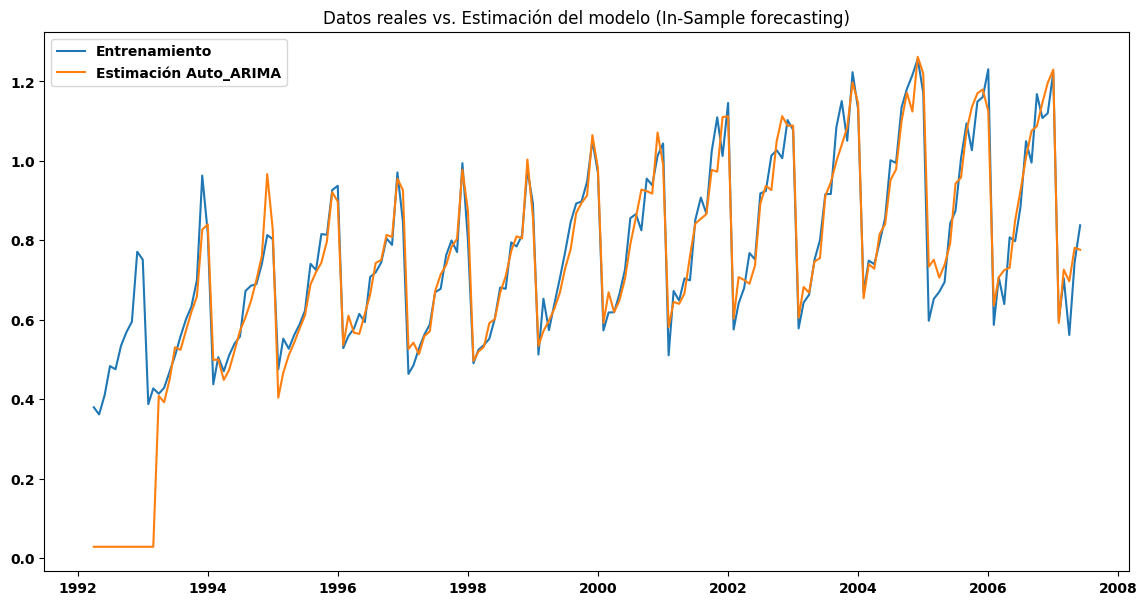

In [ ]:
estim_mod_arima_auto = mod_arima_auto.fittedvalues()
plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_mod_arima_auto, label='Estimación Auto_ARIMA')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

In [ ]:
pred_mod_arima_auto = mod_arima_auto.predict(horizonte)
pred_mod_arima_auto

2007-07-01    0.884300
2007-08-01    1.044534
2007-09-01    1.051723
2007-10-01    1.164215
2007-11-01    1.156386
2007-12-01    1.185058
2008-01-01    1.239559
2008-02-01    0.653640
2008-03-01    0.748395
2008-04-01    0.665528
2008-05-01    0.803657
2008-06-01    0.885091
Freq: MS, dtype: float64

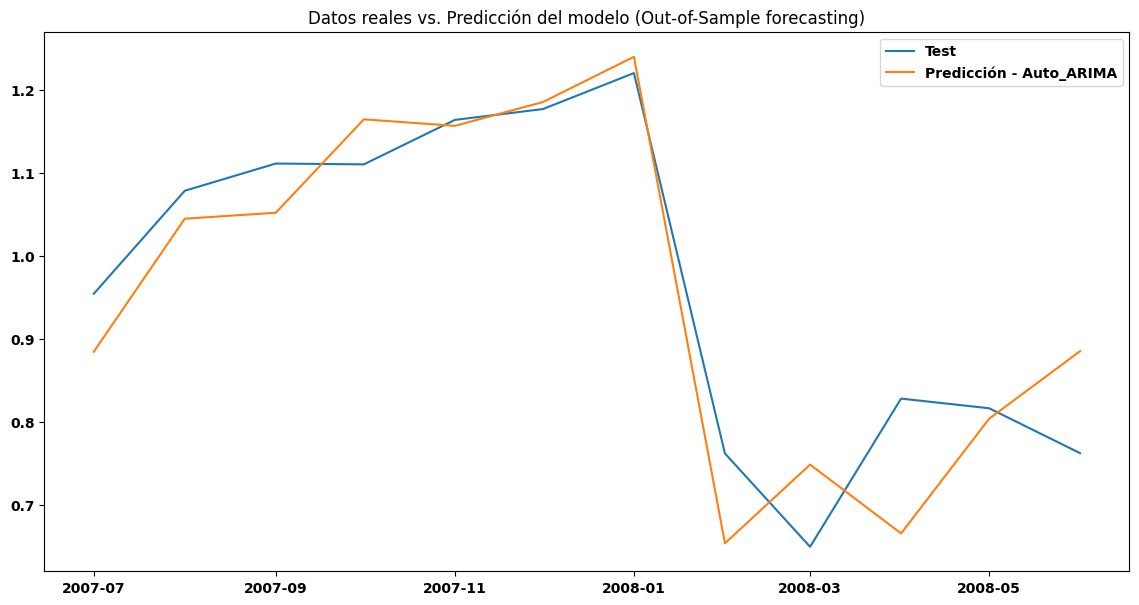

In [ ]:
plt.plot(df_test, label='Test')
plt.plot(pred_mod_arima_auto, label='Predicción - Auto_ARIMA')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [ ]:
# Métricas de evaluación del modelo
print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test,pred_mod_arima_auto ))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_mod_arima_auto)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_mod_arima_auto))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_mod_arima_auto)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_mod_arima_auto))

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 0.06310933891682553
Mean Absolute Percentage Error: 7.527693113900226
Mean Squared Error (MSE): 0.0063422512559420515
Root Mean Squared Error (RMSE): 0.07963825246665104
R^2 coefficient of determination: 0.8218350639955363


Como podemos observar en la grafica y en sus metricas de evaluacion,vemos que nuestro modelo tiene buenas predicciones y es un mejor modelo que al anterior ya que tiene un porcentage de error de un 0,5% menor.

---

### **`Ejercicio 27.3`**

**`27.3.1`** Construye un modelo de regresión con el método ___`CatBoostRegressor`___ (con sus hiperparámetros por defecto). Al igual que el modelo _AR_ (punto `27.2.2`) introduce el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Posteriormente, calcula las métricas de calidad del modelo **y analiza los resultados obtenidos**:  
- `random_state=77`
- `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

In [ ]:
from catboost import CatBoostRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg


mod_cat = ForecasterAutoreg(
                regressor = CatBoostRegressor(random_state=77, silent=True),
                lags = 48
                )

mod_cat.fit(y=df_train['venta_h02'])
pred_cat = mod_cat.predict(steps=horizonte)

# Métricas de evaluación del modelo
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_cat))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_cat)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_cat))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_cat)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_cat))

Mean Absolute Error (MAE): 0.0696226114195722
Mean Absolute Percentage Error: 7.838613721636127
Mean Squared Error (MSE): 0.006350856380136979
Root Mean Squared Error (RMSE): 0.07969226047827342
R^2 coefficient of determination: 0.8215933309989031


Como podemos observar  en las metricas de evaluacion,vemos que nuestro modelo un porcentage de error de casi un 8% lo cual nos dice que se equivoca muy poco en sus predicciones

**`27.3.2`** Realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de retrasos, teniendo en cuenta los siguientes puntos:

- Hasta el último retraso estimado en el modelo anterior inclusive (_`p`_)
- Modelo: **CatBoostRegressor**
- `random_state=77`
- `silent=True`

El mejor valor de lags podría ser = 34  que consigue un R2 = 0.8564726331942636


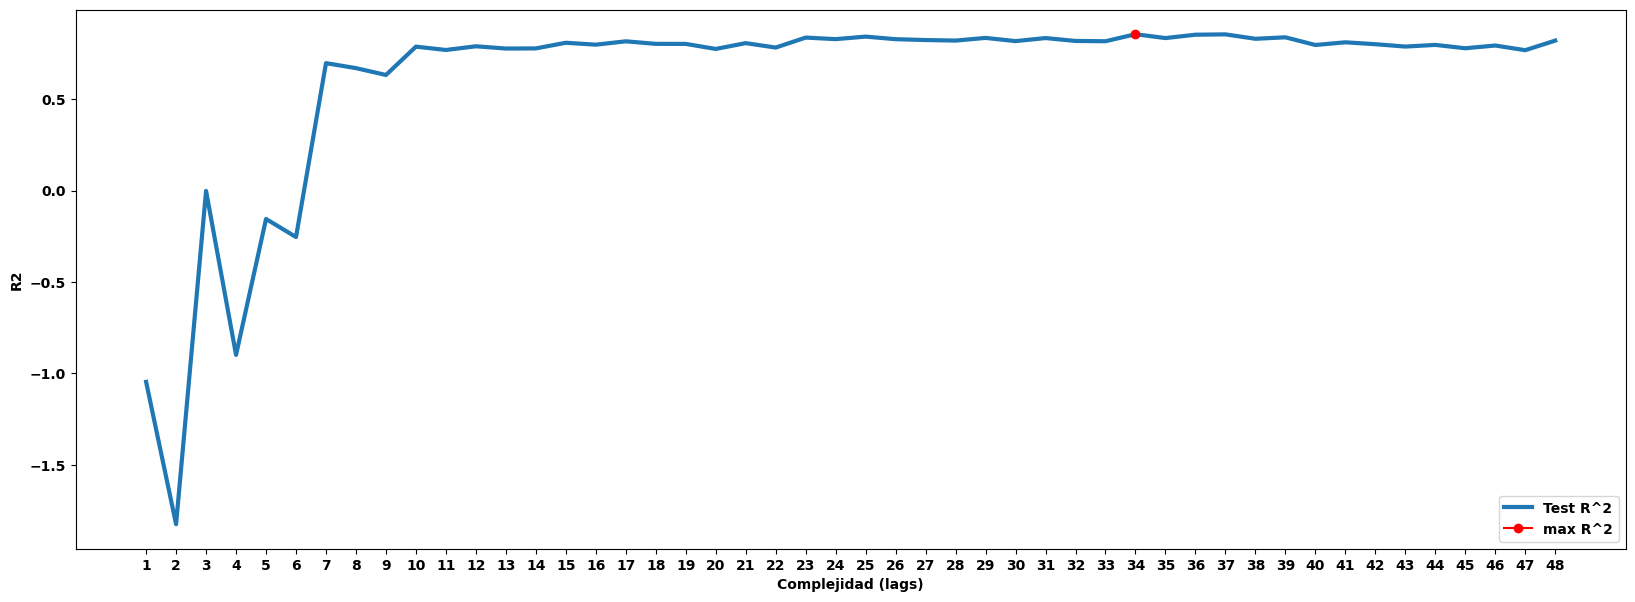

In [ ]:
# Consideramos un rango para asignar el hiperparámetro
hiper_param = np.arange(1,49)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
test_r2 = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro
    mod_bosque = ForecasterAutoreg(
                    regressor = CatBoostRegressor(random_state=77,silent=True),
                    lags = int(hiper_param[i])
                    )

    mod_bosque.fit(y=df_train['venta_h02'])
    test_r2[i] = r2_score(df_test, mod_bosque.predict(steps=12))

print("El mejor valor de lags podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param[np.argmax(test_r2)], max(test_r2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (lags)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

**`27.3.3`** Teniendo en cuenta el valor óptimo calculado en el paso anterior para los retrasos, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de **árboles**.
- inicio: **5** árboles
- fin: **200** árboles inclusive
- con pasos **de 5 en 5**

Learning rate set to 0.5
0:	learn: 0.1372664	total: 39.1ms	remaining: 156ms
1:	learn: 0.0988607	total: 65.6ms	remaining: 98.3ms
2:	learn: 0.0748602	total: 74.1ms	remaining: 49.4ms
3:	learn: 0.0613456	total: 84.1ms	remaining: 21ms
4:	learn: 0.0537931	total: 92.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1372664	total: 11ms	remaining: 99.1ms
1:	learn: 0.0988607	total: 19.3ms	remaining: 77.2ms
2:	learn: 0.0748602	total: 27.2ms	remaining: 63.5ms
3:	learn: 0.0613456	total: 36ms	remaining: 54.1ms
4:	learn: 0.0537931	total: 46.1ms	remaining: 46.1ms
5:	learn: 0.0489239	total: 53.6ms	remaining: 35.7ms
6:	learn: 0.0460558	total: 60.6ms	remaining: 26ms
7:	learn: 0.0426384	total: 65.5ms	remaining: 16.4ms
8:	learn: 0.0416360	total: 71ms	remaining: 7.89ms
9:	learn: 0.0398310	total: 78ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1372664	total: 7.83ms	remaining: 110ms
1:	learn: 0.0988607	total: 13.6ms	remaining: 88.5ms
2:	learn: 0.0748602	total: 20.4ms	remaining: 81.5ms
3:	learn:

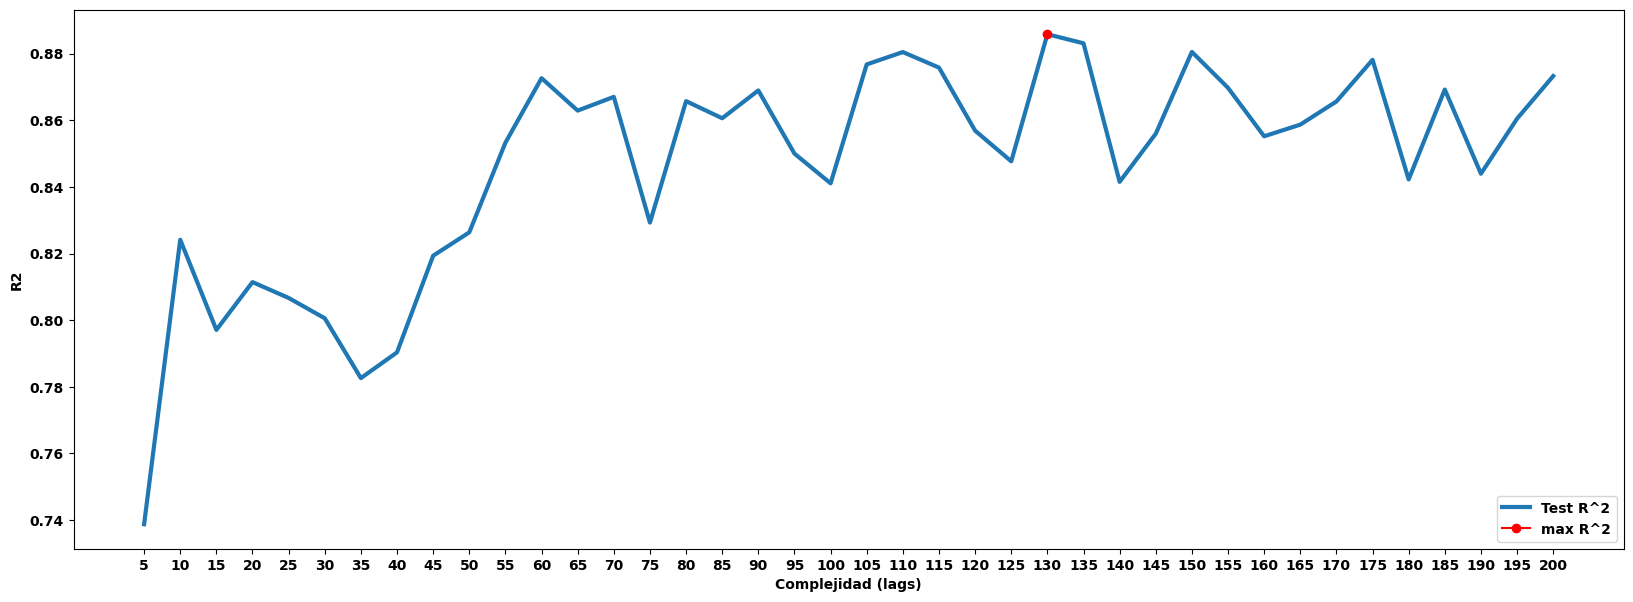

In [ ]:
# Consideramos un rango para asignar el hiperparámetro
hiper_param = np.arange(5,201,5)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
test_r2 = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro
    mod_bosque = ForecasterAutoreg(
                    regressor = CatBoostRegressor(random_state=7,n_estimators=hiper_param[i]),
                    lags = 34
                    )

    mod_bosque.fit(y=df_train['venta_h02'])
    test_r2[i] = r2_score(df_test, mod_bosque.predict(steps=12))

print("El mejor valor de n_stimators podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param[np.argmax(test_r2)], max(test_r2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (lags)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

**`27.3.4`** Teniendo en cuenta los valores óptimos calculados en los pasos anteriores, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de la **profundidad máxima**.
- Desde **2** hasta **10** no inclusive

Learning rate set to 0.159187
0:	learn: 0.1843982	total: 3.53ms	remaining: 455ms
1:	learn: 0.1633994	total: 6.53ms	remaining: 418ms
2:	learn: 0.1465089	total: 9.39ms	remaining: 397ms
3:	learn: 0.1320826	total: 12.2ms	remaining: 383ms
4:	learn: 0.1215813	total: 15.4ms	remaining: 384ms
5:	learn: 0.1121120	total: 18.3ms	remaining: 379ms
6:	learn: 0.1031926	total: 21.2ms	remaining: 373ms
7:	learn: 0.0947459	total: 24ms	remaining: 366ms
8:	learn: 0.0878326	total: 37.6ms	remaining: 505ms
9:	learn: 0.0830321	total: 40.8ms	remaining: 489ms
10:	learn: 0.0775102	total: 43.7ms	remaining: 472ms
11:	learn: 0.0738343	total: 47.2ms	remaining: 464ms
12:	learn: 0.0710962	total: 49.9ms	remaining: 449ms
13:	learn: 0.0676714	total: 54.4ms	remaining: 451ms
14:	learn: 0.0658149	total: 56ms	remaining: 429ms
15:	learn: 0.0643121	total: 57.7ms	remaining: 411ms
16:	learn: 0.0626530	total: 65.1ms	remaining: 433ms
17:	learn: 0.0610683	total: 66.2ms	remaining: 412ms
18:	learn: 0.0599611	total: 68.6ms	remaining: 40

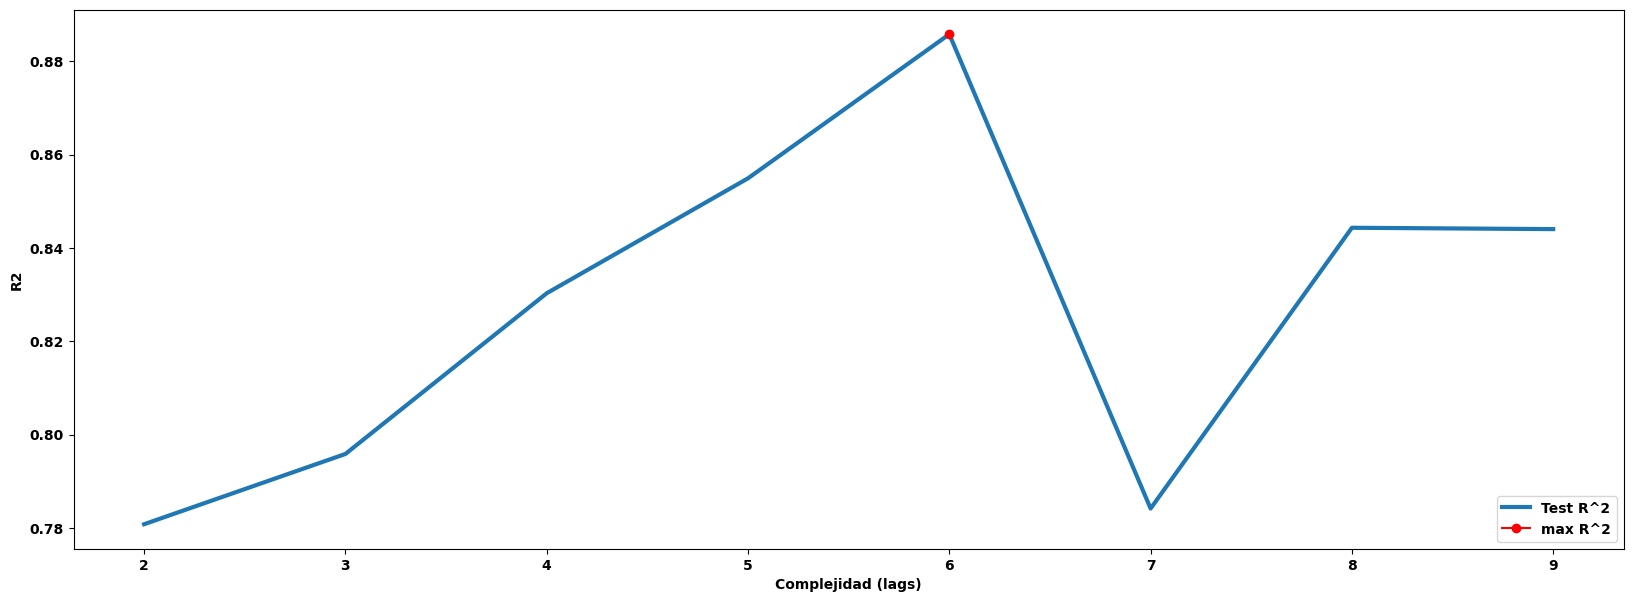

In [ ]:
# Consideramos un rango para asignar el hiperparámetro
hiper_param = np.arange(2,10)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
test_r2 = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro
    mod_bosque = ForecasterAutoreg(
                    regressor = CatBoostRegressor(random_state=7,n_estimators=130,max_depth=hiper_param[i]),
                    lags = 34
                    )

    mod_bosque.fit(y=df_train['venta_h02'])
    test_r2[i] = r2_score(df_test, mod_bosque.predict(steps=12))

print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param[np.argmax(test_r2)], max(test_r2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (lags)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()


**`27.3.5`** Construye un modelo con los hiperparámetros óptimos que hayas calculado en los puntos anteriores y calcula las métricas de calidad del modelo y de sus predicciones:

  - `random_state=77`
  - `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

In [ ]:

from skforecast.ForecasterAutoreg import ForecasterAutoreg

mod_cat_grid = ForecasterAutoreg(
                regressor = CatBoostRegressor(n_estimators=130,
                                              max_depth=6,

                                              random_state=77,
                                              silent=True),
                lags = 34
                )

mod_cat_grid.fit(y=df_train['venta_h02'])
pred_cat_grid = mod_cat_grid.predict(steps=12)

# Métricas de evaluación del modelo
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_cat_grid))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_cat_grid)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_cat_grid))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_cat_grid)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_cat_grid))

Mean Absolute Error (MAE): 0.05382603266522057
Mean Absolute Percentage Error: 6.029233288465619
Mean Squared Error (MSE): 0.004777233714508319
Root Mean Squared Error (RMSE): 0.06911753550661597
R^2 coefficient of determination: 0.8657991453387608


**`27.3.6`** Saca la gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_" y **analiza y compara los resultados** de este modelo con los modelos anteriores.

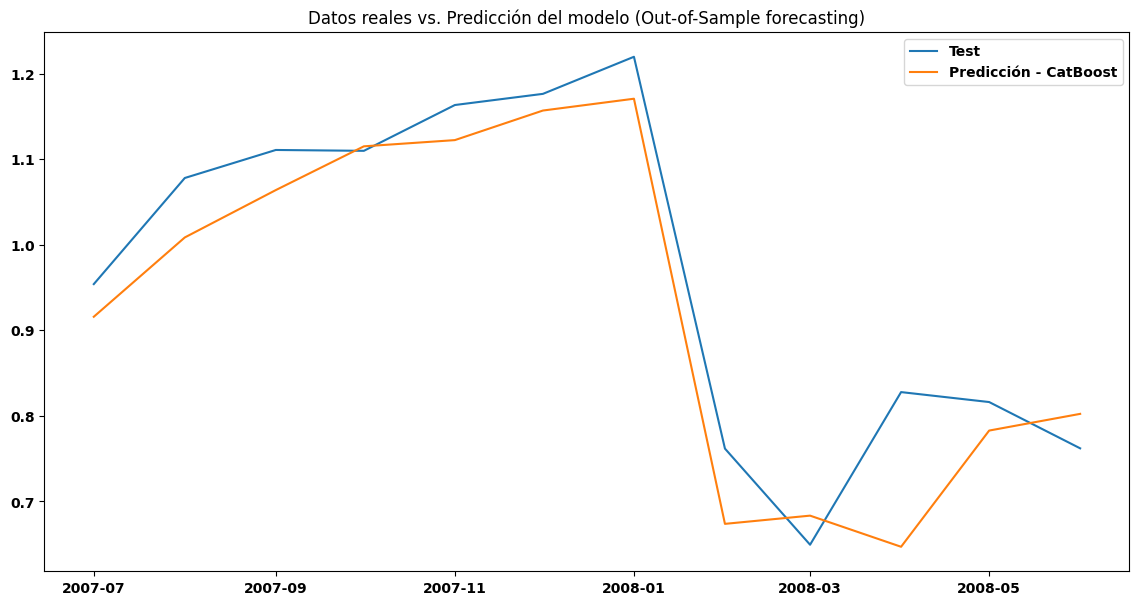

In [ ]:
plt.plot(df_test, label='Test')
plt.plot(pred_cat_grid, label='Predicción - CatBoost')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

Como podemos observar en la grafica vemos que tiene una mejor prediccion que en modelos anteriores ya que su % de error es de un 6% y es algo que se puede ver en la grafica

**`27.3.7`** Realiza un análisis tipo `In-Sample Model Evaluation` para evaluar la calidad del modelo ajustado mediante siguientes puntos **y explica los resultados obtenidos**:  

- Calcula las estimaciones del modelo ajustado (_`fitted values`_)
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_" para el periodo de entrenamiento
- Gráfica diagonal de "_Valores reales vs. valors estimados (In-Sample forecasting)_"
- Gráfica de "_Componente residual del modelo (In-Sample fitted errores)_"
- Gráficas de "_Histograma del componente residual (In-sample errors)_"
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica de la ***Desviación estándar*** y su evolución a lo largo de tiempo para **el componente residual**, considerando una ventana con el tamaño indicado:

   - `win = 12`
- El **correlograma** y la gráfica de **autocorrelación parcial** para **el componente residual** considerando el método con los retrasos indicados:

 - `lags=37`
 - `method='ywm'`
- Gráficas de posibles correlaciones entre **el componente residual** y **los valores relaes y estimados**

In [ ]:
# Crear los vectores de entrenamiento
X_train, y_train = mod_cat_grid.create_train_X_y(df_train['venta_h02'])

# Calcular los valores del modelo en el periodo de entrenamiento
fitted_values = mod_cat_grid.regressor.predict(X_train)
fitted_values

array([0.48158697, 0.55068057, 0.53080668, 0.56350167, 0.58335921,
       0.62820441, 0.73564401, 0.73192677, 0.81292065, 0.81077456,
       0.92668526, 0.93275303, 0.53207876, 0.56081713, 0.57351319,
       0.60994854, 0.59920942, 0.70459432, 0.72292246, 0.75458937,
       0.80831422, 0.79074522, 0.96655706, 0.85567592, 0.47035277,
       0.49584565, 0.53009573, 0.56429308, 0.59000701, 0.66769939,
       0.6830875 , 0.75828339, 0.80534231, 0.77607235, 0.99013623,
       0.80859395, 0.48950451, 0.52800854, 0.54459554, 0.55872859,
       0.61209139, 0.68500943, 0.68277999, 0.79229682, 0.7885413 ,
       0.80969472, 0.98071511, 0.88671135, 0.50903074, 0.63891644,
       0.57183697, 0.63448726, 0.69323984, 0.76514311, 0.83686071,
       0.8787073 , 0.89293369, 0.94291991, 1.04305558, 0.96668397,
       0.56734754, 0.62201759, 0.61149135, 0.66036242, 0.72943546,
       0.84767643, 0.86314924, 0.83257407, 0.94749724, 0.94088581,
       1.0131743 , 1.03556013, 0.52068531, 0.66362994, 0.64423

In [ ]:
# Ordenar las predicciones del modelo para el periodo de emtrenamiento
estim_rf = pd.Series(data=np.zeros(df_train.size), index=df_train.index, name='fitted')
estim_rf[:34] = np.nan
estim_rf[34:] = fitted_values
estim_rf

1992-04-01         NaN
1992-05-01         NaN
1992-06-01         NaN
1992-07-01         NaN
1992-08-01         NaN
                ...   
2007-02-01    0.602016
2007-03-01    0.705811
2007-04-01    0.569137
2007-05-01    0.751109
2007-06-01    0.833823
Freq: MS, Name: fitted, Length: 183, dtype: float64

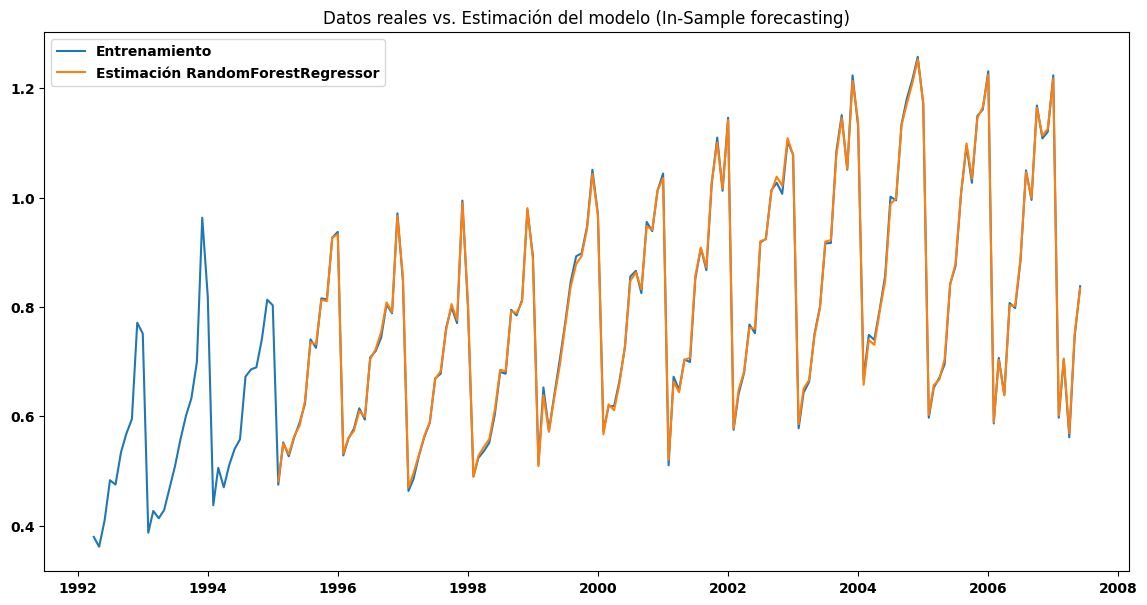

In [ ]:
plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_rf, label='Estimación RandomForestRegressor')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

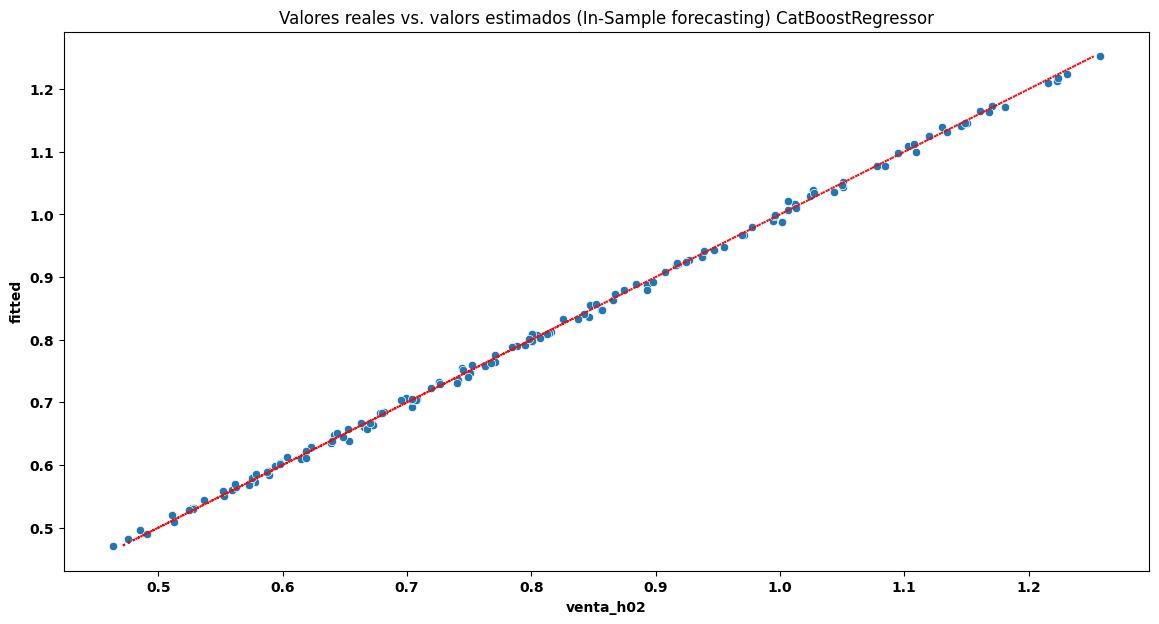

In [ ]:
# Comparar los valores reales con la estimación del modelo
sns.scatterplot(x=df_train['venta_h02'], y=estim_rf)
plt.plot(estim_rf, estim_rf, color='r', linestyle=':')
plt.title("Valores reales vs. valors estimados (In-Sample forecasting) CatBoostRegressor")
plt.show()

In [ ]:
# Calcular los valores del componente residual (In-sample errors)
resid_rf = df_train['venta_h02']-estim_rf
resid_rf

1992-04-01         NaN
1992-05-01         NaN
1992-06-01         NaN
1992-07-01         NaN
1992-08-01         NaN
                ...   
2007-02-01   -0.004263
2007-03-01   -0.001413
2007-04-01   -0.007377
2007-05-01   -0.005851
2007-06-01    0.004111
Freq: MS, Length: 183, dtype: float64

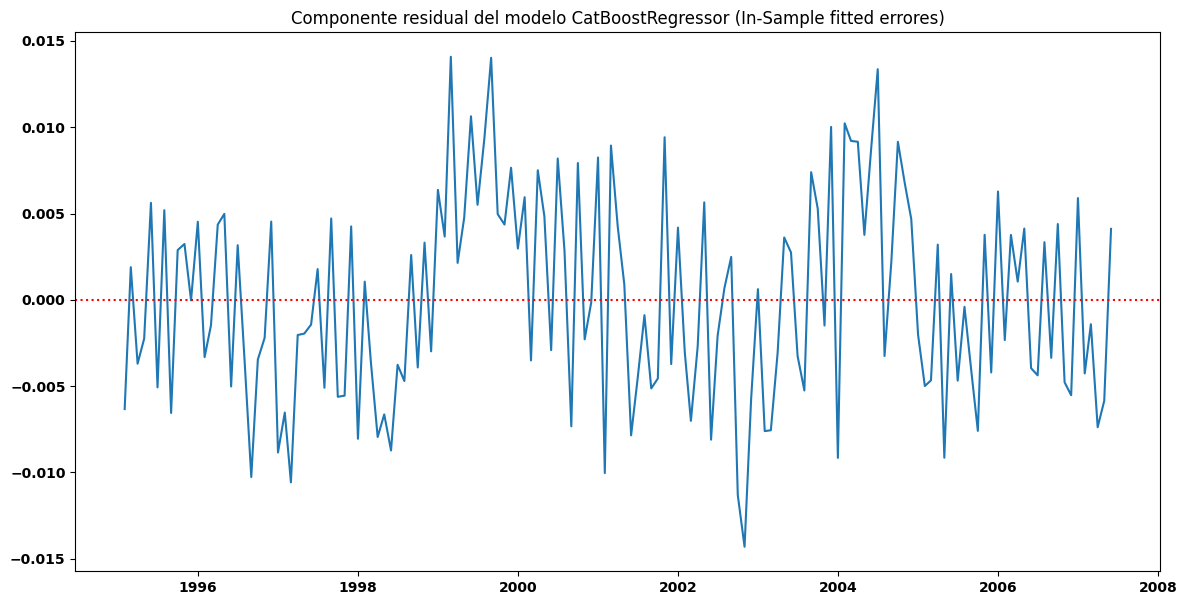

In [ ]:
plt.plot(resid_rf)
plt.title("Componente residual del modelo CatBoostRegressor (In-Sample fitted errores)")
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

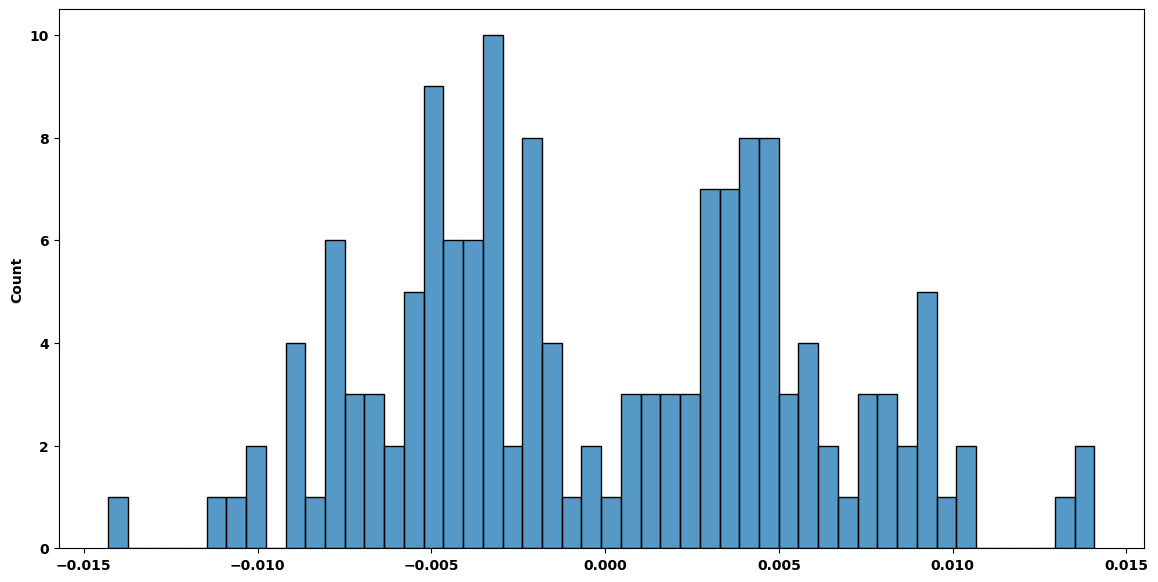

In [ ]:
# El histograma del componente residual (In-sample errors)
sns.histplot(data=resid_rf, bins=50)
plt.show()

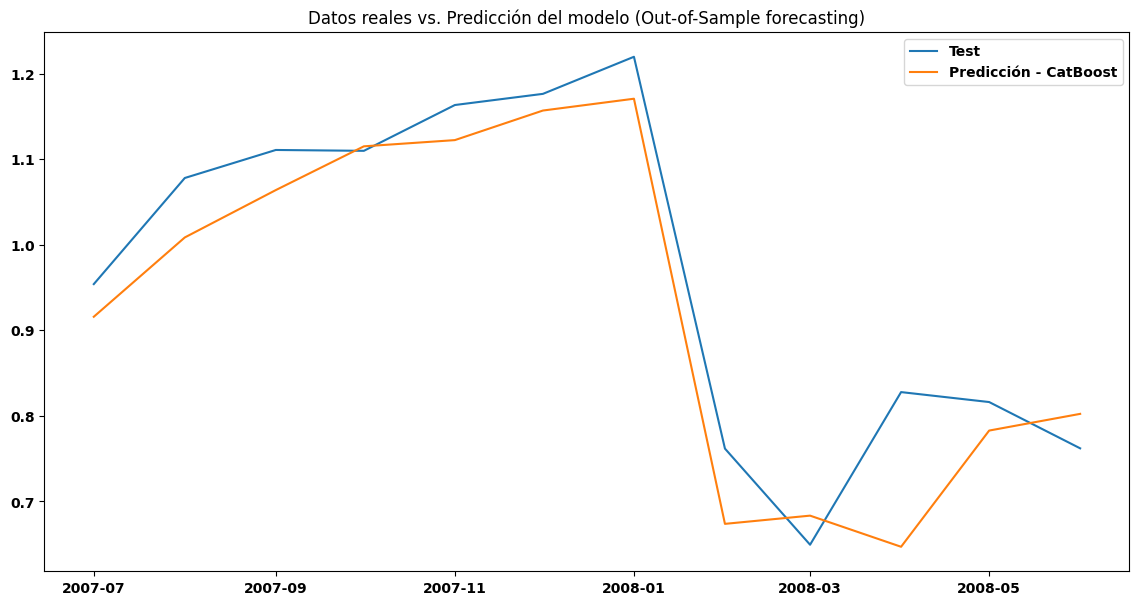

In [ ]:
plt.plot(df_test, label='Test')
plt.plot(pred_cat_grid, label='Predicción - CatBoost')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

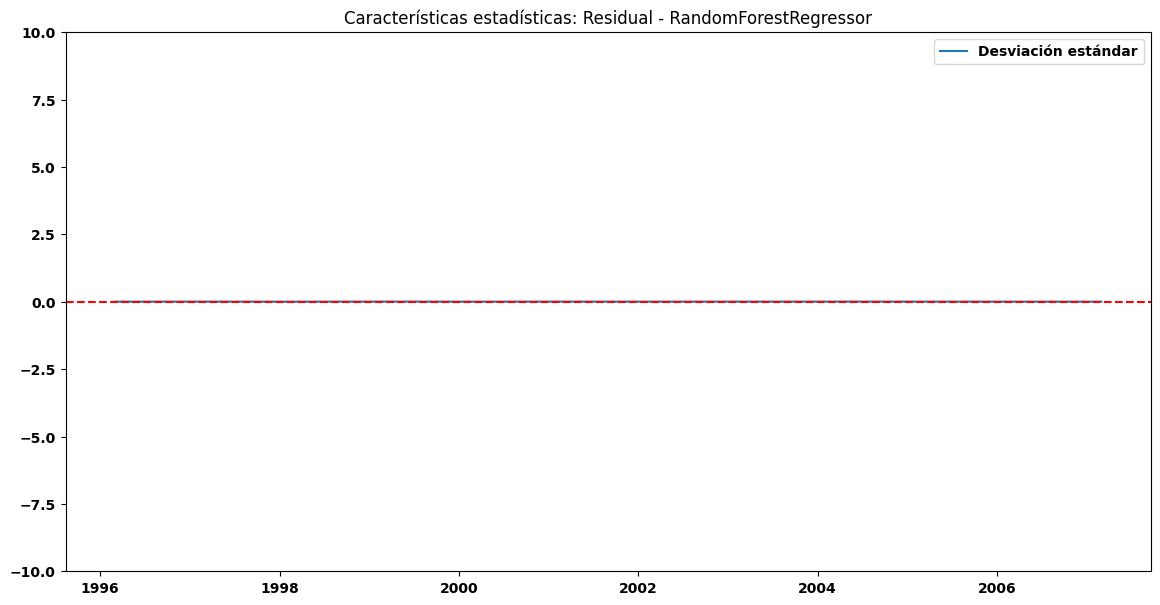

In [ ]:
win = 12
resid_rf_std = resid_rf.rolling(win).std().iloc[win-1::win]
plt.plot(resid_rf_std, label='Desviación estándar')
plt.axhline(y=resid_rf.std(), color='r', linestyle='--')
plt.title("Características estadísticas: Residual - RandomForestRegressor")
plt.ylim(-10,10)
plt.legend()
plt.show()

CORRELOGRAMA


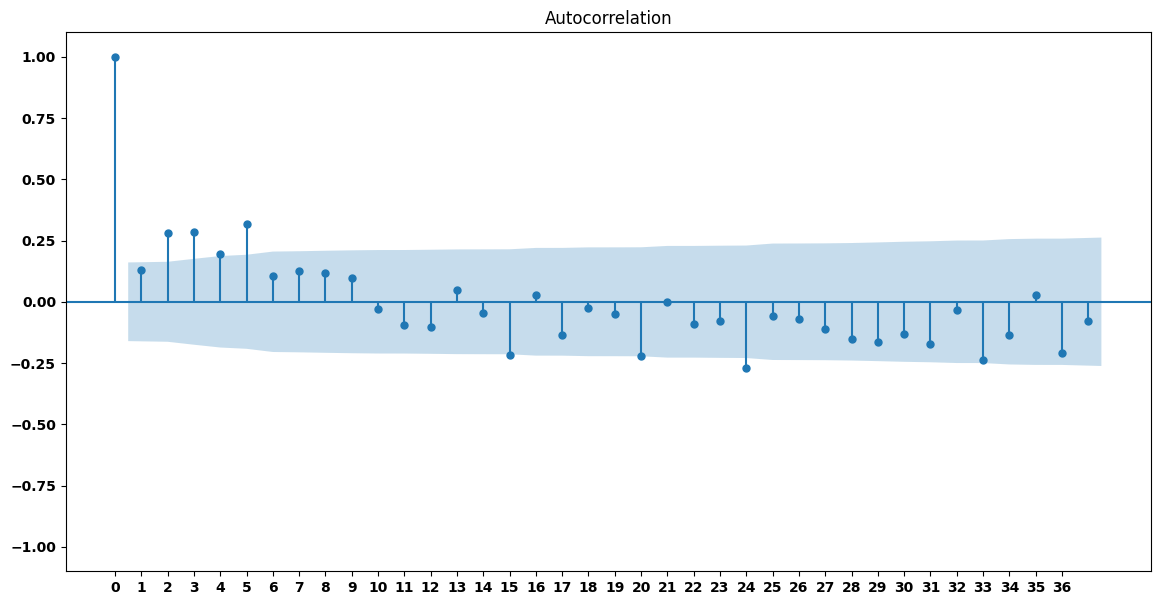

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
print("CORRELOGRAMA")
rcParams['figure.figsize'] = 14, 7
plot_acf(resid_rf.dropna(), lags=37)
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

CORRELOGRAMA PARCIAL


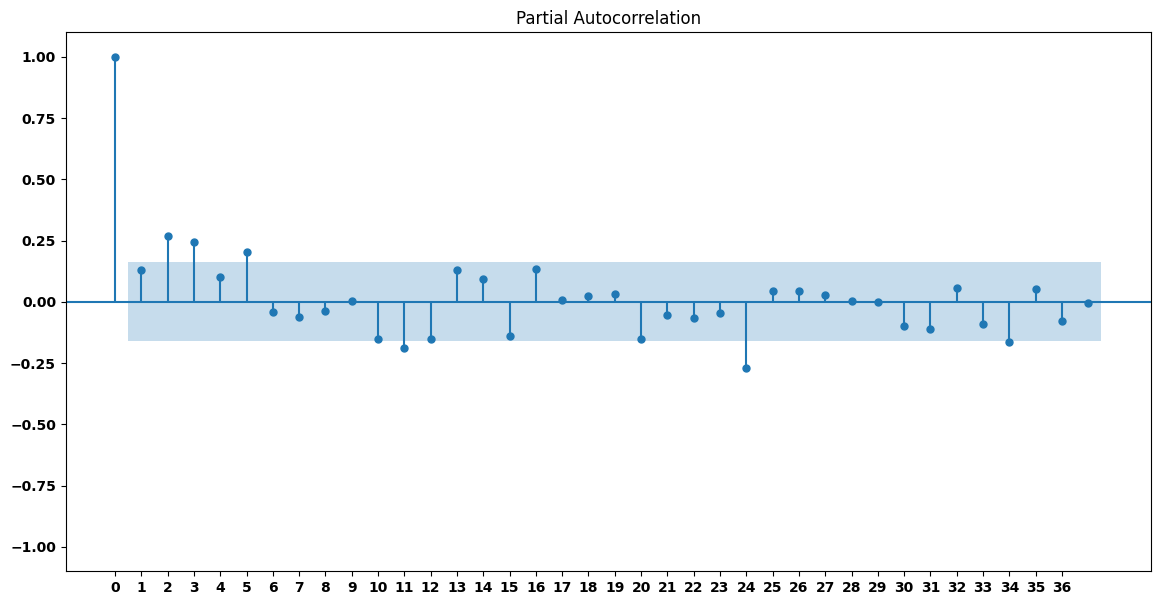

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
print("CORRELOGRAMA PARCIAL")
plot_pacf(resid_rf.dropna(), lags=37, method='ywm')
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

0.23
0.2022


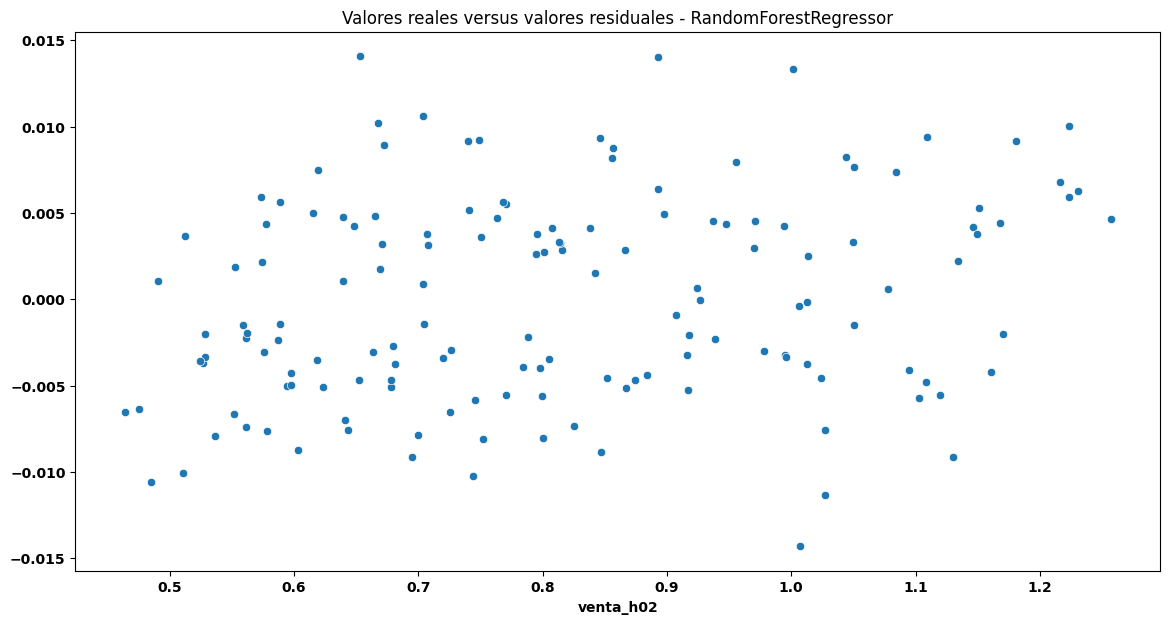

In [ ]:
# Analizamos el componente residual

# Coeficiente de correlación entre valores reales y los errores
print(df_train['venta_h02'].corr(resid_rf).round(4))

# Coeficiente de correlación entre valores estimados y los errores
print(estim_rf.corr(resid_rf).round(4))

sns.scatterplot(x=df_train['venta_h02'], y=resid_rf)
plt.title("Valores reales versus valores residuales - RandomForestRegressor")
plt.show()

Como podemos observar en las graficas vemos que nuestro modelo obtiene los mejores resultados comparandolo con modelos anteriores,ya que la estimacion de los valores practicamente son iguales a los valores reales,podria decirse que es un modelo casi perfecto.


**`27.3.8`** Saca la gráfica **interactiva** con el histórico, las predicciones de los modelos desarrollados y los valores reales del último año:

- Predicción del modelo **AR** (`27.2.2`)
- Predicción del modelo **SARIMA** (`27.2.3`)
- Predicción del modelo **CatBoostRegressor** (`27.3.5`)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))



fig.add_trace(go.Scatter(
    x=pred_mod_ar.index,
    y=pred_mod_ar,
    name="Predicción (AR)",
    mode="markers+lines"
    ))
fig.add_trace(go.Scatter(x=pred_mod_arima_auto.index,
    y=pred_mod_arima_auto,
    name="Predicción SARIMA",
    mode="markers+lines"
    ))
fig.add_trace(go.Scatter(
    x=pred_cat_grid.index,
    y=pred_cat_grid,
    name="Predicción CatBoost",
    mode="markers+lines"
    ))





fig.update_layout(title="Número de ventas de h02",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Ventas'
                  )

fig.show()

---